# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing the dataset

In [2]:
df = pd.read_csv('penguins.csv')
df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [3]:
df.dtypes

,0
species,object
island,object
bill_length_mm,float64
bill_depth_mm,float64
flipper_length_mm,float64
body_mass_g,float64
sex,object


# Exploring data set

## Check and fill missing values

In [4]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [5]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Checking for missing value

In [6]:
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


<Axes: >

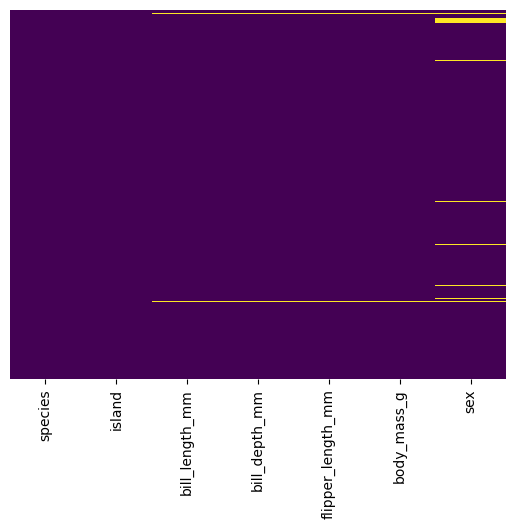

In [7]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [8]:
numerical_column = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

for col in numerical_column:
    df[col].fillna(df[col].mean(), inplace=True)

categorical_column = ['sex']

for col in categorical_column:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [9]:
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


<Axes: >

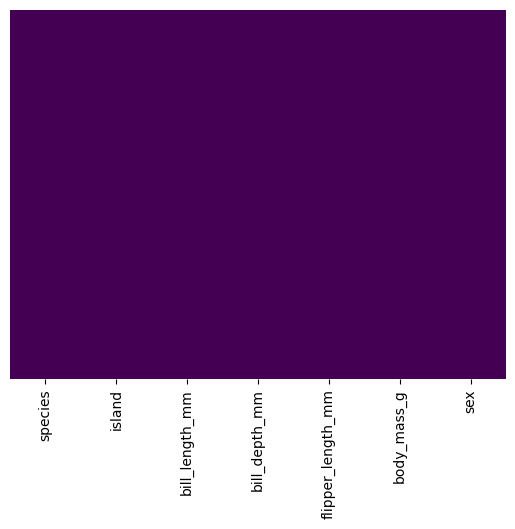

In [10]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Create new column to rescale value

In [11]:
df['body_mass_kg'] = df['body_mass_g']/1000
df['flipper_length_cm'] = df['flipper_length_mm']/10
df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,body_mass_kg,flipper_length_cm
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,male,3.750000,18.10000
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,female,3.800000,18.60000
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,female,3.250000,19.50000
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,male,4.201754,20.09152
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,female,3.450000,19.30000
5,Adelie,Torgersen,39.30000,20.60000,190.000000,3650.000000,male,3.650000,19.00000
6,Adelie,Torgersen,38.90000,17.80000,181.000000,3625.000000,female,3.625000,18.10000
7,Adelie,Torgersen,39.20000,19.60000,195.000000,4675.000000,male,4.675000,19.50000
8,Adelie,Torgersen,34.10000,18.10000,193.000000,3475.000000,male,3.475000,19.30000
9,Adelie,Torgersen,42.00000,20.20000,190.000000,4250.000000,male,4.250000,19.00000


## Plotting Parallel Coordinates Graph

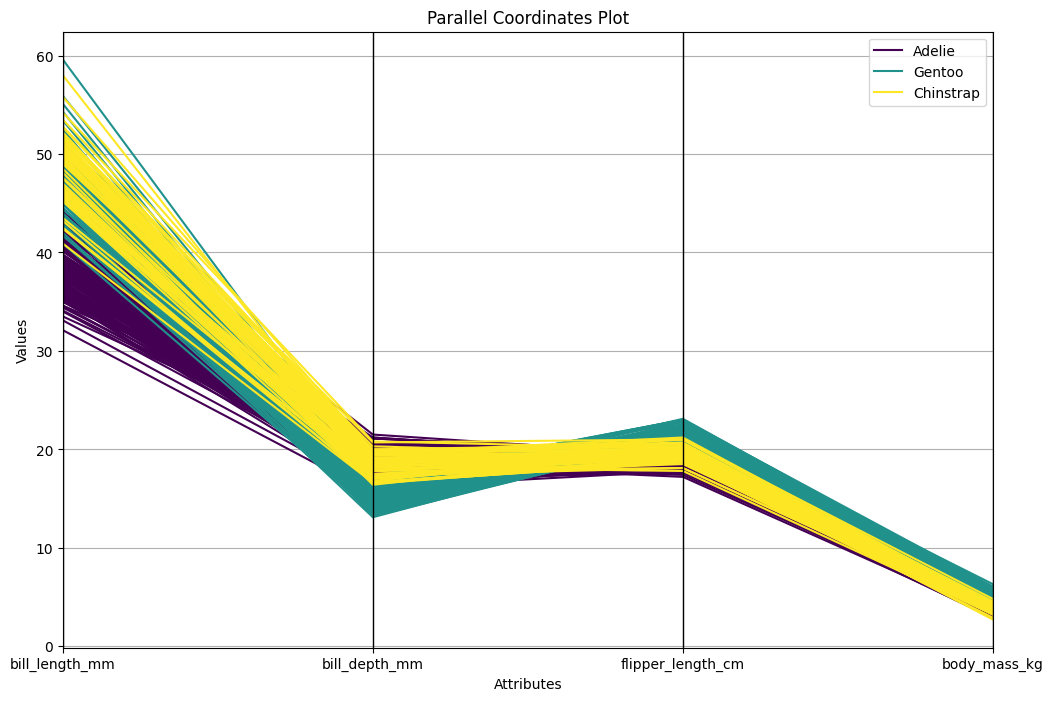

In [12]:
from pandas.plotting import parallel_coordinates

columns_of_interest = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_cm', 'body_mass_kg', 'species']

df_plot = df[columns_of_interest]

# Create a parallel coordinates plot
plt.figure(figsize=(12, 8))
parallel_coordinates(df_plot, class_column= "species", colormap='viridis',)
plt.title('Parallel Coordinates Plot')
plt.xlabel('Attributes')
plt.ylabel('Values')
plt.show()

Bad example

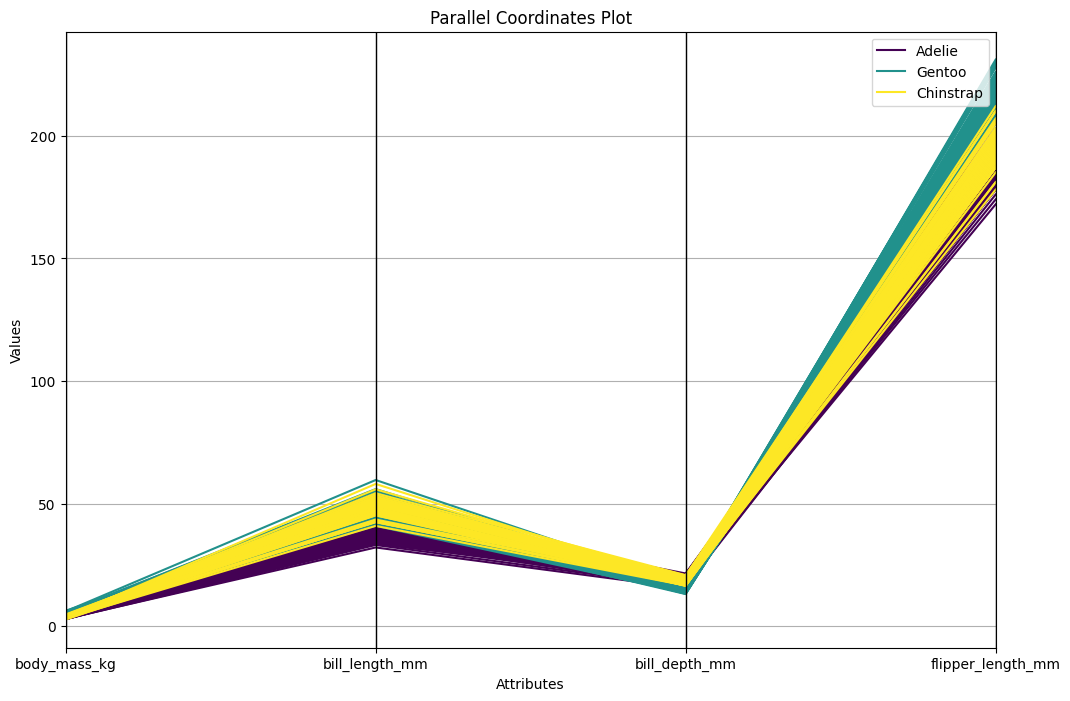

In [13]:
from pandas.plotting import parallel_coordinates

columns_of_interest = ['body_mass_kg', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',  'species']

df_plot = df[columns_of_interest]

# Create a parallel coordinates plot
plt.figure(figsize=(12, 8))
parallel_coordinates(df_plot, class_column= "species", colormap='viridis',)
plt.title('Parallel Coordinates Plot')
plt.xlabel('Attributes')
plt.ylabel('Values')
plt.show()